In [11]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import pickle 

with open("../data/processed/preprocessed_data.pkl","rb") as f:
    data = pickle.load(f)

X_train_resampled = data["X_train_resampled"]
y_train_resampled = data["y_train_resampled"]
X_test_processed = data["X_test_processed"]
y_test = data["y_test"]

In [13]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"===== {model_name} =====")
    print(classification_report(y_true, y_pred))

    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Accuracy: 0.7374024130589071
Precision: 0.5033898305084745
Recall: 0.7941176470588235
F1 Score: 0.6161825726141079
ROC-AUC: 0.8400191170012142


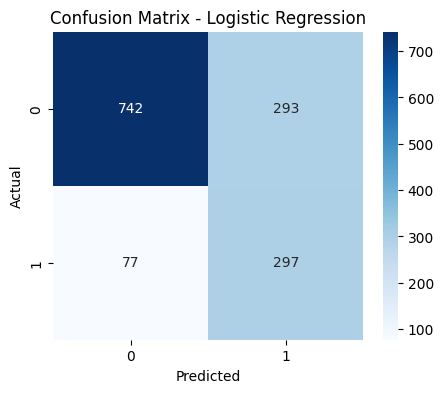

In [14]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_lr = log_reg.predict(X_test_processed)
y_prob_lr = log_reg.predict_proba(X_test_processed)[:, 1]

evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

===== RandomForestClassifier =====
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1035
           1       0.57      0.55      0.56       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

Accuracy: 0.7714691270404542
Precision: 0.5718232044198895
Recall: 0.553475935828877
F1 Score: 0.5625
ROC-AUC: 0.8176393086879019


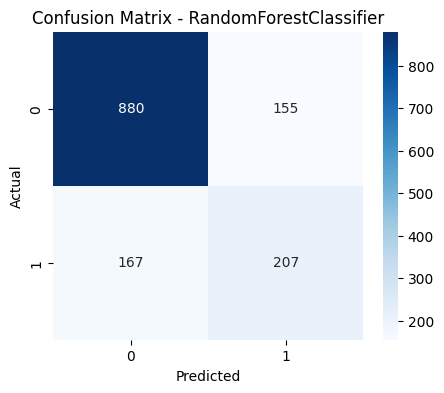

In [15]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test_processed)
y_prob_rf = rf.predict_proba(X_test_processed)[:, 1]

evaluate_model(y_test, y_pred_rf, y_prob_rf, "RandomForestClassifier")

===== XGBoost =====
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Accuracy: 0.7799858055358411
Precision: 0.5820512820512821
Recall: 0.606951871657754
F1 Score: 0.5942408376963351
ROC-AUC: 0.8306647032989743


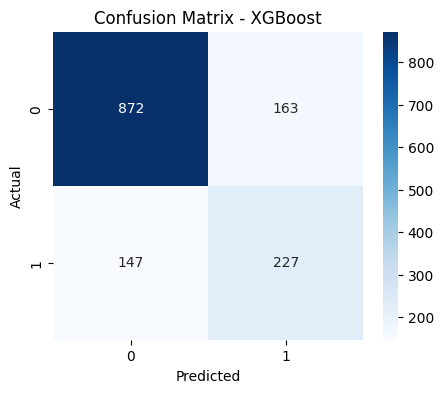

In [16]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test_processed)
y_prob_xgb = xgb.predict_proba(X_test_processed)[:,1]

evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

In [17]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ]
})

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.737402,0.503390,0.794118,0.616183,0.840019
1,Random Forest,0.771469,0.571823,0.553476,0.562500,0.817639
2,XGBoost,0.779986,0.582051,0.606952,0.594241,0.830665


In [19]:
import pickle
import os

# Create the folder if not exists
os.makedirs("../models", exist_ok=True)

# Save each trained model
with open("../models/model_logreg.pkl", "wb") as f:
    pickle.dump(log_reg, f)

with open("../models/model_rf.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("../models/model_xgb.pkl", "wb") as f:
    pickle.dump(xgb, f)

print("Models saved successfully!")

Models saved successfully!
